# Satellite Image Processing - Flood Analysis

## Natural Hazards - Floods in Asia

The **monsoons** mark a type of climatic variation that occurs in southern and southeastern **Asia**. It is an atmospheric phenomenon that favors the occurrence of **intense rains** in one period of the year and **severe droughts** in another.

During the summer, the humid air masses coming from the ocean favor the formation of clouds that precipitate in the form of strong storms during much of the year. Thus, **floods** are very common in the region.

But monsoons, in addition to minimizing drought and aiding agriculture, can often bring cascading **natural hazards** events, such as floodings and landslides. Thus, it is important to study events related to monsoons, so that a better **risk management plan** can be devised.

In recent years, **rainfall** has increased in Asia during the monsoons, which has also brought even more **severe flooding**, affecting communities in South and East Asia, resulting in significant social impacts. The numbers of rains are breaking records and, in the last month of **July 2020**, they hit the region the hardest, resulting in **massive floods**, **devastating many lives** and also bringing huge **economic losses**. More information about flooding in Asia can be found [here (NASA)](https://www.earthobservatory.nasa.gov/images/147006/excessive-monsoon-rains-flood-asia) and [here](https://asia.nikkei.com/Spotlight/Asia-Insight/Flooded-Asia-Climate-change-hits-region-the-hardest).

---

## Spectral Indices

## Normalized Difference Water Index (NDWI)

A popular spectral index for water is the **Normalized Difference Water Index (NDWI)**. Usually, it is used for **water content** measurements in **plants**, but it is also largely applied for **drought** and **flood analysis**. 

Among other water indexes, **NDWI** presents the most reliable threshold for water detection (Ji et al., 2009). The NDWI was developed by McFeeters (1996) using the **green** and **near-infrared** bands to enhance the presence of water and decrease the presence of soil and vegetation features. McFeeters (1996) also adds that the NDWI has a land cover type threshold of 0, so values **greater** than **0** can already be classified as **water**.

References:

* Ji, L., Zhang, L., Wylie, B. (2009). Analysis of Dynamic Thresholds for the Normalized Difference Water Index. *Photogrammetric Engineering & Remote Sensing*,11,1307-1317. https://doi.org/10.14358/PERS.75.11.1307.<br>


* McFeeters, S.K. (1996). The use of the Normalized Difference Water Index (NDWI) in the delineation of open water features. *International Journal of Remote Sensing*,17,7,1425-1432.
https://doi.org/10.1080/01431169608948714.<br>

The equation for **NDWI calculation** is presented below (McFeeters 1996):

<img src='jpg/NDWI_equation.jpg' />

**NDWI** values range from **-1** to **1**. Values **closer to 1**, the **greater** the **presence of water**, while **values closer to -1**, the **greater** the presence of **bare soils**, **land** or **less water content**.

The content of the next paragraph seems obvious, but it is good to write this down, it is a good exercise, because we can properly think about the whole **meaning** of the **values** mentioned above. So, here we go:

With this line of thinking we can make the calculations and **identify** areas that have **more water content** (**values closer to 1**), which can indicate **flooded areas**, and regions with **low values**, **closer to -1**, that can indicate **drought areas**. 

Of course, you need to put this in **context**, for example, **built-up** areas will present **lower values**, so you will not assume a drought scenario in this case.

---

## Notebook Overview

This notebook will guide the first step for working with **NDWI** with ***python*** and **Sentinel-2 imagery**. Once again, we start showing how to open the images and create your own raster composite. Later, we load these composites in ***numpy*** arrays and calculate the **NDWI** rasters from **pre-** and **post-flooding** scenarios. In the end, we make the change analysis calculation, **subtracting pre-flooding** from **post-flooding** scenes, which results in a **1-band raster** with the changes and consequently the **flooded areas**. 

---

## Dataset

Considering the importance of the **monsoons** in Asia and the amount of **flooding events** each year, the dataset used in this example was retrieved from the **Copernicus Hub** covering part of **Bangladesh**. Taking into account the usual **flooding period/monsoons period**, we use a **pre- and a post-monsoon** images, from **April** and **October 2020**, respectively. In this way, we can also perform a **change analysis** to identify **flooded areas**.


|        Imagery         |          Category         |
|:---------------------: | :------------------------:|
|       04-04-2020       |      Pre-flood event      |
|       16-10-2020       |      Post-flood event     |

---

## Sentinel-2 imagery bands for NDWI Calculation

Hereby you can see the overview of the bands we use to calculate the **NDWI**. On the left, there are the bands from our composites that we created from the respective bands from **Sentinel-2** (right side).


                                                 -Raster composite with 2 bands-

|   Band number of our composite    |   Band number of Sentinel-2    |
| :-------------------------------: | :----------------------------: |
|             Band 1 - Green        |          Band 3 - Green        |
|    Band 2 - NIR (Near-infrared)   |  Band 8 - NIR (Near-infrared)  |

---

## ***Let's start!***

In [1]:
# importing necessary libraries
from osgeo import ogr, gdal, osr
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import colors

### Accessing the images and creating a composite

In [2]:
# Getting path directory
imagePath = "./data/"

As we have seen, to calculate the **NDWI** we will need only **2 bands** from our set of images. Here we load up the **green** and **NIR** bands with ***rasterio***. The composite we are creating below is referred to the **pre-flooding** event, so imagery from **04-04-2020**.

In [3]:
# Using path directory to load each band
band3_ryj_pre = rasterio.open(imagePath+'T45RYJ_20200404T043659_B03_10m.jp2', driver='JP2OpenJPEG') #green
band8_ryj_pre = rasterio.open(imagePath+'T45RYJ_20200404T043659_B08_10m.jp2', driver='JP2OpenJPEG') #nir

In [4]:
# quick check on band metadata
band3_ryj_pre.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': None,
 'transform': Affine(10.0, 0.0, 699960.0,
        0.0, -10.0, 2900040.0)}

### Reading Sentinel-2 image bands and writing the composite - Pre-flooding

In [5]:
#creating a new tiff composite
composite_ryj_pre = rasterio.open(imagePath+'S2B_MSIL2A_20200404T043659_N0214_R033_T45RYJ_2bands.tiff','w',driver='GTiff',
                         width=band3_ryj_pre.width, height=band3_ryj_pre.height,
                         count=2,
                         crs="+proj=utm +zone=45 +ellps=WGS84 +units=m +no_defs ",
                         transform=band3_ryj_pre.transform,
                         dtype=band3_ryj_pre.dtypes[0]
                         )
# parsing bands RGB
composite_ryj_pre.write(band3_ryj_pre.read(1),1) #green
composite_ryj_pre.write(band8_ryj_pre.read(1),2) #nir
composite_ryj_pre.close()

---

## NDWI calculation - Pre-flooding event

In [6]:
# opening the dataset with rasterio
pre_flooding_tiff = rasterio.open(imagePath+'S2B_MSIL2A_20200404T043659_N0214_R033_T45RYJ_2bands.tiff',driver='Gtiff')

Right now, we need to pass the bands from our raster composite into **numpy** arrays.

In [7]:
# Loading each band into numpy arrays
band_green_pre = pre_flooding_tiff.read(1)
band_nir_pre = pre_flooding_tiff.read(2)

Let's calculate now the **NDWI** for **pre-event** with the equation previously explained, using the **green** and **NIR** bands.

In [8]:
# allowing division by zero
np.seterr(divide='ignore', invalid='ignore')

ndwi_pre = (band_green_pre.astype(float) - band_nir_pre.astype(float)) / (band_green_pre + band_nir_pre)

### NDWI calculation results - Pre-flooding event

We can quick check the range values for **ndwi-pre**:

In [9]:
# quick check on calculated NDWI pre-event values
print(np.nanmin(ndwi_pre)) 
print(np.nanmax(ndwi_pre))

-1.0
0.7003942181340341


Great! Our values are in the expected range, between **-1** to **1**.

### Writing/Saving NDWI pre-flooding image

Now, let's save our **1-band raster** with these **pre-flooding** results.

In [10]:
# getting the metadata of the input tiff
meta_pre = pre_flooding_tiff.meta
print(meta_pre)


# retrieving the dtype from our ndwi_pre
ndwi_pre_dtype = ndwi_pre.dtype
print(ndwi_pre_dtype)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 2, 'crs': CRS.from_epsg(32645), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 2900040.0)}
float64


In [11]:
# updating dtype to float64
meta_pre.update({"dtype": "float64"})
print(meta_pre)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 2, 'crs': CRS.from_epsg(32645), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 2900040.0)}


In [12]:
# creating kwargs variable from meta
kwargs_pre = meta_pre


# updating the count value
kwargs_pre.update(count=1)

In [13]:
# saving new raster file
with rasterio.open(imagePath+'S2B_MSIL2A_20200404T043659_N0214_R033_T45RYJ_ndwi_pre.tiff', 'w', **kwargs_pre) as dst:
        dst.write(ndwi_pre, 1)

---

## Displaying the NDWI image - Pre-flooding

We can plot and visualize our **NDWI pre-flooding** results.

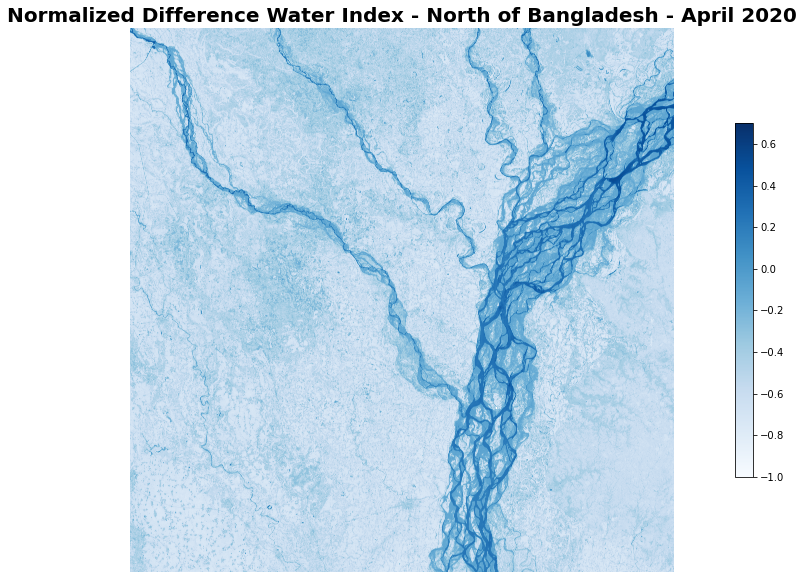

In [14]:
plt.figure(figsize=(22,10))
fig = plt.imshow(ndwi_pre, cmap='Blues')
plt.colorbar(shrink=0.65)
plt.title('Normalized Difference Water Index - North of Bangladesh - April 2020', loc='center',fontsize=20, fontweight='bold')
plt.axis('off')
# Displaying the results.
plt.show()

---

## Calculating NDWI for post-flooding

Now, we can go further with the analysis and process the **post-flooding** image. The **processing steps** will be similar to what we did for **pre-event**.

Let's open the **green** and **NIR** bands:

In [15]:
# Using path directory to load each band
band3_ryj_post = rasterio.open(imagePath+'T45RYJ_20201016T043801_B03_10m.jp2', driver='JP2OpenJPEG') #green
band8_ryj_post = rasterio.open(imagePath+'T45RYJ_20201016T043801_B08_10m.jp2', driver='JP2OpenJPEG') #nir

In [16]:
# quick check on band metadata
band3_ryj_post.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': None,
 'transform': Affine(10.0, 0.0, 699960.0,
        0.0, -10.0, 2900040.0)}

### Reading Sentinel-2 image bands and writing the composite - Post-flooding

Once again, we will create our **1-band raster** using ***rasterio***:

In [17]:
#creating a new tiff composite
composite_ryj_post = rasterio.open(imagePath+'S2A_MSIL2A_20201016T043801_N0214_R033_T45RYJ_2bands.tiff','w',driver='GTiff',
                         width=band3_ryj_post.width, height=band3_ryj_post.height,
                         count=2,
                         crs="+proj=utm +zone=45 +ellps=WGS84 +units=m +no_defs ",
                         transform=band3_ryj_post.transform,
                         dtype=band3_ryj_post.dtypes[0]
                         )
# parsing bands RGB
composite_ryj_post.write(band3_ryj_post.read(1),1) #green
composite_ryj_post.write(band8_ryj_post.read(1),2) #nir
composite_ryj_post.close()

---

## NDWI calculation - Post-flooding event

In [18]:
# opening the dataset with rasterio
post_flooding_tiff = rasterio.open(imagePath+'S2A_MSIL2A_20201016T043801_N0214_R033_T45RYJ_2bands.tiff',driver='Gtiff')

In order to perform the raster calculations, we need to parse the bands into ***numpy*** arrays.

In [19]:
# Loading each band into numpy arrays
band_green_post = post_flooding_tiff.read(1)
band_nir_post = post_flooding_tiff.read(2)

Making use of the **NDWI** calculation from McFeeters (1996):

In [20]:
# allowing division by zero
np.seterr(divide='ignore', invalid='ignore')

ndwi_post = (band_green_post.astype(float) - band_nir_post.astype(float)) / (band_green_post + band_nir_post)

### NDWI calculation results - Post-flooding event

A quick check on the results can be done retrieving the **maximum** and **minimum** values of our ***numpy*** array:

In [21]:
# quick check on calculated NDWI post-event values
print(np.nanmin(ndwi_post)) 
print(np.nanmax(ndwi_post))

-1.0
1.0


Once again, our results are between **-1** and **1**.

### Writing/Saving NDWI post-flooding image

To finish this step, we will use ***rasterio*** to save the **post-flooding** results locally.

In [22]:
# getting the metadata of the input tiff
meta_post = post_flooding_tiff.meta
print(meta_post)


# retrieving the dtype from our ndwi_post
ndwi_post_dtype = ndwi_post.dtype
print(ndwi_post_dtype)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 2, 'crs': CRS.from_epsg(32645), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 2900040.0)}
float64


In [23]:
# updating dtype to float64
meta_post.update({"dtype": "float64"})
print(meta_post)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 2, 'crs': CRS.from_epsg(32645), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 2900040.0)}


In [24]:
# creating kwargs variable from meta
kwargs_post = meta_post


# updating the count value
kwargs_post.update(count=1)

In [25]:
# saving new raster file
with rasterio.open(imagePath+'S2A_MSIL2A_20201016T043801_N0214_R033_T45RYJ_ndwi_post.tiff', 'w', **kwargs_post) as dst:
        dst.write(ndwi_post, 1)

---

## Displaying the NDWI image - Post-flooding

The **NDWI post-flooding** results can also be visualized using ***matplotlib***:

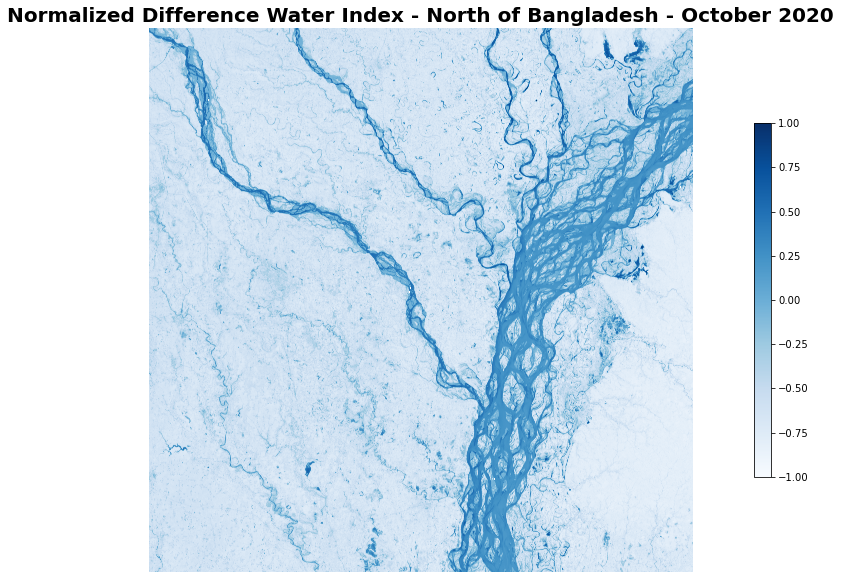

In [26]:
plt.figure(figsize=(22,10))
fig = plt.imshow(ndwi_post, cmap='Blues',)
plt.colorbar(shrink=0.65)
plt.title('Normalized Difference Water Index - North of Bangladesh - October 2020', loc='center',fontsize=20, fontweight='bold')
plt.axis('off')
# Displaying the results.
plt.show()

---

## Plotting both NDWI images (Pre- and Post-flooding)

As we are working with **satellite imagery**, nothing gives more insights (or not say pleasure!) to **display** and **visualize** our products. So, before we continue with the **change analysis**, we can plot the same rasters above **- ndwi_pre and ndwi_post -** side by side.   

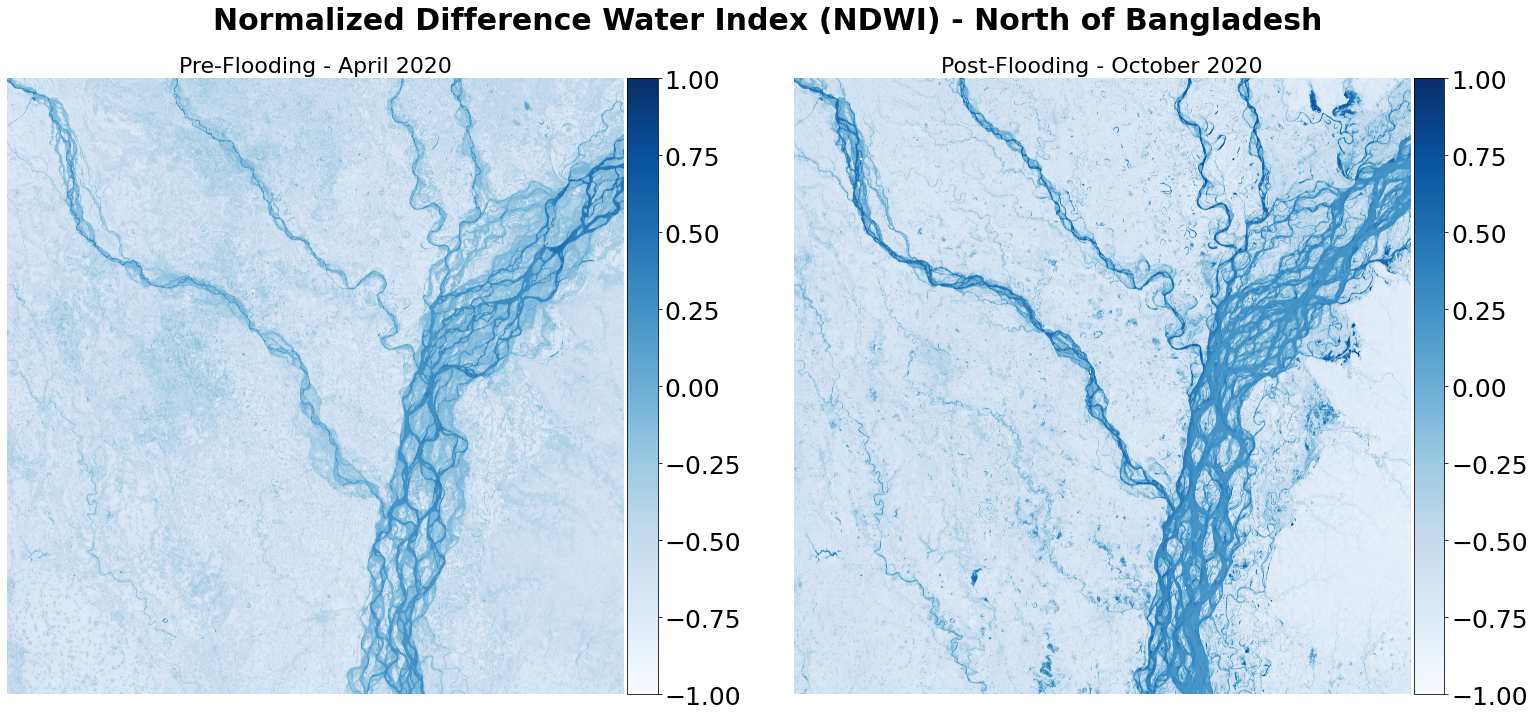

In [27]:
# importing library for colorbar placement and size
from mpl_toolkits.axes_grid1 import make_axes_locatable

# we have to call subplots
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(22, 10))
plt.suptitle('Normalized Difference Water Index (NDWI) - North of Bangladesh',fontsize=30, fontweight='bold')

# displaying ndwi pre flooding
norm1 = colors.Normalize(vmin=-1, vmax=1, clip=False)
img1 = ax1.imshow(ndwi_pre, cmap='Blues',norm=norm1)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_title('Pre-Flooding - April 2020', loc='center',fontsize=22)
ax1.axis('off')
cbar1 = fig.colorbar(img1,cax=cax1)
cbar1.ax.tick_params(labelsize=25)

# displaying ndwi post flooding
img2 = ax2.imshow(ndwi_post, cmap='Blues')
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad=0.05)
ax2.set_title('Post-Flooding - October 2020', loc='center',fontsize=22)
ax2.axis('off')
cbar2 = fig.colorbar(img2, cax=cax2)
cbar2.ax.tick_params(labelsize=25)


plt.tight_layout(h_pad=1)
plt.subplots_adjust(top=0.88)

Great! In this way, we can already clearly see some **differences** between the **two images**. The **surroundings** of the October **stream channels** seem **wider** than in April. That probably means we have **flooded areas**.

---

# Change Analysis

Now is the time to calculate the **difference** between the two events, **pre-** and **post-flood**. We can do this simply by **subtracting** one from the other, **post-** from **pre-event**. By performing **change analysis**, we can visualize the differences and provide quantitative information about the **flood event**.

So, let's start calculating the changes between our ***numpy*** arrays, **post-** and **pre-flooding**:

In [28]:
ndwi_flood_extent = ndwi_post - ndwi_pre

## Displaying the Change Analysis results

We can make a list of colors and use it to plot the results with ***matplotlib***:

In [29]:
from matplotlib.colors import ListedColormap
ndwi_colors = ["sandybrown","moccasin","oldlace","lightskyblue","mediumblue"]
ndwi_cmap = ListedColormap(ndwi_colors)

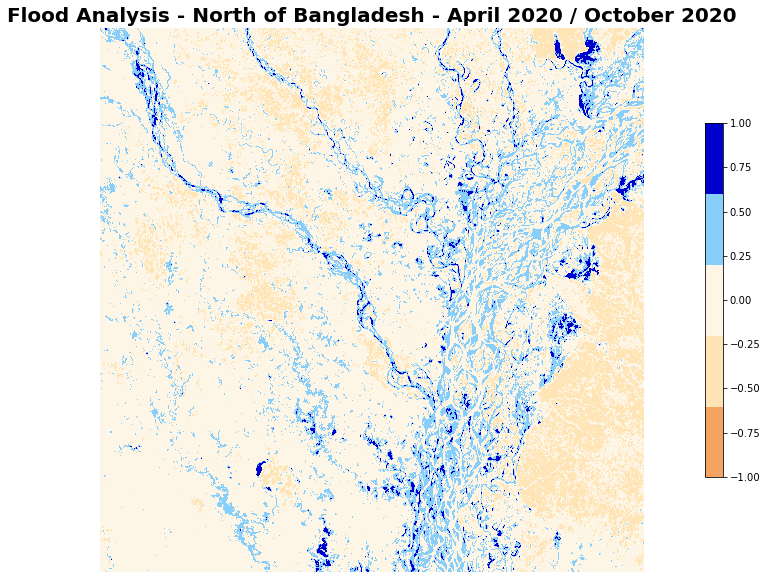

In [30]:
plt.figure(figsize=(22,10))
fig = plt.imshow(ndwi_flood_extent, cmap=ndwi_cmap,vmin=-1,vmax=1)
plt.colorbar(shrink=0.65)
plt.title('Flood Analysis - North of Bangladesh - April 2020 / October 2020', loc='center',fontsize=20, fontweight='bold')
plt.axis('off')
# Displaying the results.
plt.show()

In order to standardize any no data values, we can transform our **ndwi_flood_extent** into a new ***numpy*** array using a conditional calculation:

In [31]:
ndwi_change = np.where((ndwi_pre>-999) & (ndwi_post>-999),ndwi_flood_extent,-999)
ndwi_change

array([[ 0.35910805,  0.45687404,  0.44541243, ...,  0.64865982,
         0.80236603,  0.69512518],
       [ 0.43268767,  0.45012819,  0.4379605 , ...,  0.85378824,
         0.94651003,  0.85358331],
       [ 0.49091762,  0.45682859,  0.42618858, ...,  0.96912352,
         1.00237236,  0.96558069],
       ...,
       [ 0.02506262,  0.0224975 ,  0.04263484, ..., -0.08459497,
        -0.09776331, -0.11466618],
       [ 0.02701379,  0.01931191, -0.0054208 , ..., -0.09504322,
        -0.09647632, -0.12791616],
       [-0.01910118, -0.03900018, -0.0347518 , ..., -0.13765636,
        -0.09520429, -0.10770926]])

Let's also plot it: 

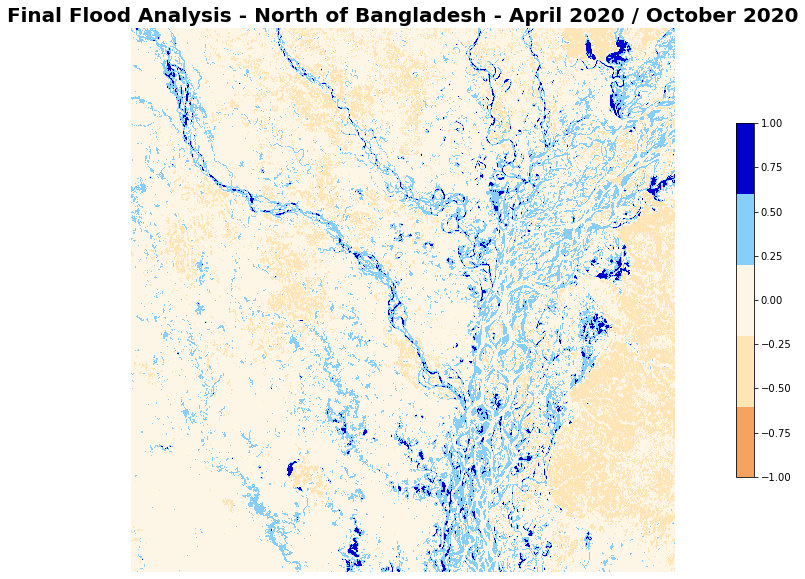

In [32]:
plt.figure(figsize=(22,10))
fig = plt.imshow(ndwi_change, cmap=ndwi_cmap,vmin=-1,vmax=1)
plt.colorbar(shrink=0.65)
plt.title('Final Flood Analysis - North of Bangladesh - April 2020 / October 2020', loc='center',fontsize=20, fontweight='bold')
plt.axis('off')
# Displaying the results.
plt.show()

We will store these results locally using ***rasterio***.

In [33]:
# saving new raster file
with rasterio.open(imagePath+'S2A_MSIL2A_N0214_R033_T45RYJ_ndwi_change_04_apr_16_oct_2020.tiff', 'w', **kwargs_post) as dst:
        dst.write(ndwi_change, 1)

## Change Analysis Discussion

It is very important to note that the results also range from **-1** to **1**, but we can interpret them slightly different from the **NDWI** values. Change analysis shows that values **closer to 0 do not represent changes**, while values **closer to 1 or -1 tend to show larger changes**. 

As we are dealing with a **water index**, we can understand the values **closest to -1** located in water bodies and their surroundings, as probably **drought areas**. Likewise, values **close to 1** probably highlight the **extent** of the **water**, meaning that we have had **larger changes** to the water and that we likely have **flooded areas**.

---

## Change Analysis -  Quantitative Information

We have now calculated the flood extent from **pre-** and **post-monsoon** imagery. We can go further and calculate the flood extent area. 

This is an important information, especially when thinking about **natural disaster events** and their **impact** on affected areas. Identifying **“hot spots”** can help entities better **assess** the impact and therefore choose the **best actions to help affected communities**.

As explained earlier for our change analysis, values **closer to 1** likely show **flooded areas**. For this reason, we will create a new ***numpy*** array by filtering out cell data values **greater than 0.80**.

In [34]:
flooded_areas = ndwi_change > 0.80

In [35]:
flooded_areas_corrected = np.where((ndwi_pre>-999.00) & (ndwi_post>-999.00),flooded_areas,-999.00)

### Plotting the Change Analysis values greater than 0.80

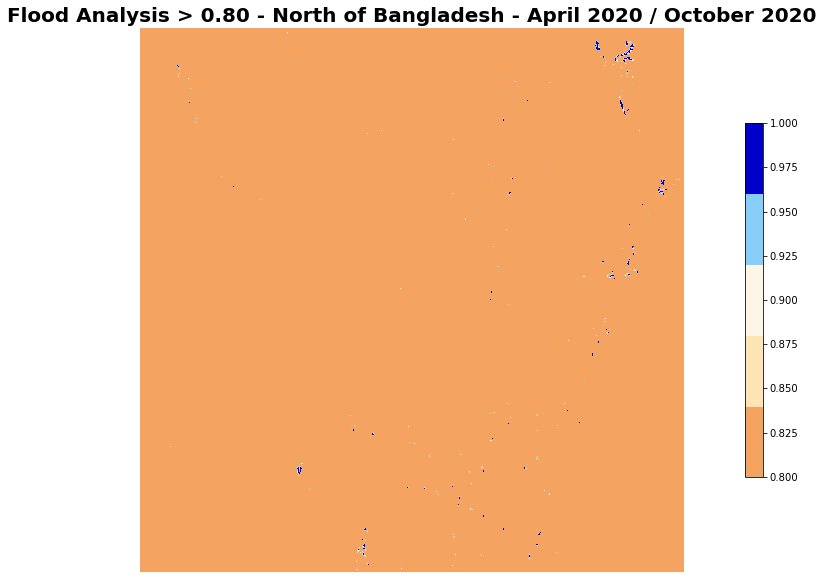

In [36]:
plt.figure(figsize=(22,10))
fig = plt.imshow(flooded_areas_corrected, cmap=ndwi_cmap,vmin=0.80,vmax=1)
plt.colorbar(shrink=0.65)
plt.title('Flood Analysis > 0.80 - North of Bangladesh - April 2020 / October 2020', loc='center',fontsize=20, fontweight='bold')
plt.axis('off')
# Displaying the results.
plt.show()

### Writing/Saving Change Analysis results image

In [37]:
# getting the metadata of the input tiff
meta_change_080 = post_flooding_tiff.meta
print(meta_change_080)


# retrieving the dtype from our ndwi_post
flooded_areas_corrected_dtype = flooded_areas_corrected.dtype
print(flooded_areas_corrected_dtype)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 2, 'crs': CRS.from_epsg(32645), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 2900040.0)}
float64


In [38]:
# updating dtype to float64
meta_change_080.update({"dtype": "float64"})
print(meta_change_080)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 2, 'crs': CRS.from_epsg(32645), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 2900040.0)}


In [39]:
# creating kwargs variable from meta
kwargs_change_080 = meta_change_080


# updating the count value
kwargs_change_080.update(count=1)
print(kwargs_change_080)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32645), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 2900040.0)}


In [40]:
# saving new raster file
with rasterio.open(imagePath+'S2A_MSIL2A_N0214_R033_T45RYJ_ndwi_change_04_apr_16_oct_2020_biggerthan080.tiff', 'w', **kwargs_change_080) as dst:
        dst.write(flooded_areas_corrected, 1)

---

## Calculating the flood extent area in Km2

The flood extent **area** can be calculated using simply mathematical operations with ***geopandas*** and ***pandas***. But first, we have to create a **polygon shapefile** of our **filtered flood areas greater than 0.80**.

The geoprocessing analysis workflow will now consist of producing a **shapefile of contour lines** using ***GDAL*** and then **polygonizing** those lines with ***Fiona***.

In [41]:
# setting data path
dataPath = "./data/"

In [42]:
# loading up the filtered flood extent tiff
dataset_ndwi = gdal.Open(dataPath+'S2A_MSIL2A_N0214_R033_T45RYJ_ndwi_change_04_apr_16_oct_2020_biggerthan080.tiff')
ndwi_raster = dataset_ndwi.GetRasterBand(1)

Our raster file is a **boolean** raster, so **pixels** with **value of 1** represent **change analysis values greater than 0.80**. **Pixel values of zero** are showing **change analysis values smaller than 0.80**. 

As we are only interested in the **flooded areas**, we will retrieve only the **values of 1 from the tiff** to create ou lines shapefile.

In [43]:
# creating contour lines shapefile
ogr_ds = ogr.GetDriverByName('ESRI Shapefile').CreateDataSource(dataPath+'contours_ndwi_change.shp')

prj=dataset_ndwi.GetProjectionRef()
srs = osr.SpatialReference(wkt=prj)

contour_shp = ogr_ds.CreateLayer('contour', srs)
field_defn = ogr.FieldDefn("ID", ogr.OFTInteger)
contour_shp.CreateField(field_defn)
field_defn = ogr.FieldDefn("NDWI_change", ogr.OFTReal)
contour_shp.CreateField(field_defn)

#Creating contour lines from the values of 1
gdal.ContourGenerate(ndwi_raster, 1, 0, [], 1, -999, contour_shp, 0, 1)
ogr_ds = None

Let's use ***geopandas*** to visualize our new **lines shapefile** dataset.

In [44]:
# importing necessary library
import geopandas

PROJ: proj_create_from_database: Cannot find proj.db


In [45]:
# writing the shapefile locally
contours_ndwi_change = geopandas.read_file(dataPath+'contours_ndwi_change.shp')

We can check the head of the data. Note that our values are **all 1** and the **geometry** is **linestring**.

In [46]:
contours_ndwi_change.head()

,ID,NDWI_chang,geometry
0,0,1.0,"LINESTRING (726815.000 2900040.000, 726815.000..."
1,1,1.0,"LINESTRING (809745.000 2900040.000, 809745.000..."
2,2,1.0,"LINESTRING (701075.000 2900040.000, 701075.000..."
3,3,1.0,"LINESTRING (707595.000 2900040.000, 707595.000..."
4,4,1.0,"LINESTRING (773825.000 2900025.000, 773825.000..."


In [47]:
contours_ndwi_change.crs

<Projected CRS: EPSG:32645>
Name: WGS 84 / UTM zone 45N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 84°E to 90°E - by country
- bounds: (84.0, 0.0, 90.0, 84.0)
Coordinate Operation:
- name: UTM zone 45N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Displaying the **countour lines shapefile**:

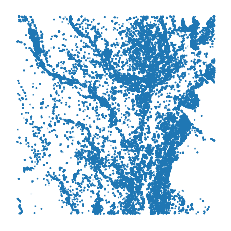

In [48]:
# plotting our contour shapefile
contours_ndwi_change.plot()
plt.axis('off');

Now that we have the **lines shapefile** ready, we have to create a **polygon** from each **"line area"**. We can use ***Fiona*** and ***Shapely*** to carry out this task.

In [49]:
import fiona
from shapely.geometry import shape, mapping
from fiona.crs import from_epsg


shp_lines = dataPath+'contours_ndwi_change.shp'
output_poly = dataPath+'polygons_ndwi_change.shp'


schema = {
    'geometry': 'Polygon',
    'properties' : {'id':'int'}
}

with fiona.open(shp_lines) as in_shp, fiona.open(output_poly, 'w', 'ESRI Shapefile', schema) as out_shp:

    for index, row in enumerate(in_shp):
        line = shape(row['geometry'])
        hull_poly = line.convex_hull
        out_shp.write({
            'geometry': mapping(hull_poly),
            'properties': {'id': index},
        })

Continuing with our activity, we will open and read the new **flooded areas polygon shapefile** and perform the necessary **calculations** and **data manipulation**.

In [50]:
# opening and reading the polygon shapefile
polygons_ndwi_change = geopandas.read_file(dataPath+'polygons_ndwi_change.shp')

In [51]:
# checking the head of the dataset
polygons_ndwi_change.head()

,id,geometry
0,0,"POLYGON ((726805.000 2900035.000, 726805.000 2..."
1,1,"POLYGON ((809755.000 2900025.000, 809745.000 2..."
2,2,"POLYGON ((701095.000 2900015.000, 701085.000 2..."
3,3,"POLYGON ((707585.000 2900025.000, 707585.000 2..."
4,4,"POLYGON ((773825.000 2900025.000, 773825.000 2..."


In [52]:
# setting the correct CRS
polygons_ndwi_change.crs = "EPSG:32645"

In [53]:
polygons_ndwi_change.crs

<Projected CRS: EPSG:32645>
Name: WGS 84 / UTM zone 45N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 84°E to 90°E - by country
- bounds: (84.0, 0.0, 90.0, 84.0)
Coordinate Operation:
- name: UTM zone 45N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's also display the **polygon shapefile (flooded areas)**:

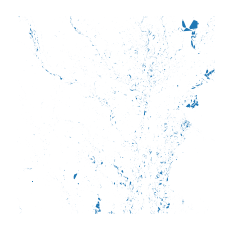

In [54]:
# plotting our polygon shapefile - flooded areas
polygons_ndwi_change.plot()
plt.axis('off');

### Calculating the area

In order to **preserve area measure**, we will **reproject** the **polygon shapefile** to **cylindrical equal-area** format. 

In [55]:
# creating a copy and changing the projection
polygons_ndwi_change_equal_areas = polygons_ndwi_change.copy()
polygons_ndwi_change_equal_areas= polygons_ndwi_change_equal_areas.to_crs({'proj':'cea'})

In [56]:
polygons_ndwi_change_equal_areas.crs

<Projected CRS: +proj=cea +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
# checking the head of the dataset
polygons_ndwi_change_equal_areas.head()

,id,geometry
0,0,"POLYGON ((9937471.011 2799765.398, 9937471.011..."
1,1,"POLYGON ((10029788.742 2798215.986, 10029777.8..."
2,2,"POLYGON ((9908843.110 2800128.425, 9908832.147..."
3,3,"POLYGON ((9916070.297 2800045.543, 9916070.297..."
4,4,"POLYGON ((9989810.289 2798941.527, 9989810.289..."


Finally, we will **calculate** the **area** of **each polygon** in these shapefile. We can use the **geometry** column as input, and add a **new area column** containing the results.

In [58]:
# calculating the area of each polygon
polygons_ndwi_change_equal_areas["area"] = polygons_ndwi_change_equal_areas['geometry'].area/ 10**6
polygons_ndwi_change_equal_areas.head()

,id,geometry,area
0,0,"POLYGON ((9937471.011 2799765.398, 9937471.011...",4.997669e-05
1,1,"POLYGON ((10029788.742 2798215.986, 10029777.8...",6.240191e-05
2,2,"POLYGON ((9908843.110 2800128.425, 9908832.147...",4.999001e-04
3,3,"POLYGON ((9916070.297 2800045.543, 9916070.297...",9.997390e-05
4,4,"POLYGON ((9989810.289 2798941.527, 9989810.289...",1.998065e-16


The final step of this activity is to calculate the **total extent of the flooded area** in square kilometers. We can use a ***pandas*** operation to **sum up** all the values we achieved above.

In [59]:
# calculating total flooded area extent in Km2
total_area = polygons_ndwi_change_equal_areas["area"].sum().round(2)

Let's print the final result:

In [60]:
print('The total flooding area is {} Km2.'.format(total_area))

The total flooding area is 250.33 Km2.
